In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv



<img src="https://i.ibb.co/1T5Wbn6/Banner-para-Linkedin-capa-de-perfil-para-programador.png"  alt="KCode Banner"  />

<a href="https://www.linkedin.com/in/kauebr/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="30" ></a> <a href="mailto: kauemandarino@gmail.com"><img src="https://cdn-icons-png.flaticon.com/512/5968/5968534.png" width="30" ></a><a href="
https://api.whatsapp.com/send?phone=554192811435&text=Oi"> <img src="https://imagepng.org/wp-content/uploads/2017/08/whatsapp-icone-1.png" width="30" ></a><a href="https://github.com/kauebr/"><img src="https://github.githubassets.com/images/modules/logos_page/Octocat.png" width="30" ></a>


# Competição Kaggle: NLP com Tweets de Desastres - Previsão de Tweets sobre Desastres Reais

Neste notebook, abordamos a competição Kaggle 'NLP com Tweets de Desastres'. O objetivo é classificar tweets como relacionados a desastres reais ou não. 

# O objetivo:
* Prever quais tweets estão relacionados a desastres reais e quais não estão.

Me foi disponibilizado 2 datasets, um de teste e um de treino, vou iniciar pegando só o dataframe de treino, e subdividir ele em treino/teste para que eu possa avaliar a eficácia do meu modelo antes da postagem das previsões reais.

In [2]:
# Importando biliotecas necessárias
import pandas as pd

In [3]:
# Criando conjunto de dados
df = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
df_teste = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

In [4]:
### Agora vamos dar uma olhada no conjunto de dados
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


### Análise quanto a váriavel *Keyword*

In [5]:
# Exibindo valores unicos
df['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [6]:
# Calculando nulos
keyword_nulos = df['keyword'].isna().sum()

# Calculando a porcentagem de valores nulos na coluna 'keyword'
keyword_nulos = df['keyword'].isna().sum()
total_linhas = len(df)
porcentagem = (keyword_nulos / total_linhas) * 100

# Exibindo a porcentagem de valores nulos

print('Conjunto de Treino:')
print(f"Quantidade de valores NaN na coluna 'keyword':", keyword_nulos)
print(f"Valores nulos representam {porcentagem:.2f}% do total.")

Conjunto de Treino:
Quantidade de valores NaN na coluna 'keyword': 61
Valores nulos representam 0.80% do total.


In [7]:
## Agora vamos ver no conjunto de teste


# Calculando a porcentagem de valores nulos na coluna 'keyword'
keyword_nulos = df_teste['keyword'].isna().sum()
total_linhas = len(df_teste)
porcentagem = (keyword_nulos / total_linhas) * 100

# Exibindo a porcentagem de valores nulos

print('Conjunto de Teste:')
print(f"Quantidade de valores NaN na coluna 'keyword':", keyword_nulos)
print(f"Valores nulos representam {porcentagem:.2f}% do total.")

Conjunto de Teste:
Quantidade de valores NaN na coluna 'keyword': 26
Valores nulos representam 0.80% do total.


### Que interessante a amostra estatística tem o mesmo valor do parâmetro
Agora vamos medir a correlação entre a variavel e o alvo

In [8]:
df['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

Como a variável 'keyword' é uma string e a variável 'target' é booleana, podemos usar a análise de contingência e o teste do qui-quadrado para avaliar o grau da relação entre as duas variaveis.

O valor de qui-quadrado mede a divergência entre a distribuição observada e a distribuição esperada se as duas variáveis forem independentes. O valor de p é a probabilidade de obter uma estatística de qui-quadrado tão extrema quanto a observada, assumindo que as duas variáveis são independentes.

Se o valor de p for menor que um nível de significância (geralmente 0.05), podemos rejeitar a hipótese nula de independência e inferir que há uma associação significativa entre 'keyword' e 'target'.

In [9]:
from scipy.stats import chi2_contingency

# Criando uma tabela de contingência entre 'keyword' e 'target'
contingency_table = pd.crosstab(df['keyword'], df['target'])

# Realizando o teste do qui-quadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Resultado do teste qui-quadrado:")
print("Valor de qui-quadrado:", chi2)
print("Valor de p:", p_value)

Resultado do teste qui-quadrado:
Valor de qui-quadrado: 2268.7255777003475
Valor de p: 0.0


Com base no resultado do teste qui-quadrado, obtemos um valor de qui-quadrado de 2268.73 e um valor de p próximo a zero (0.0). Isso indica que há uma relação forte entre a variável 'keyword' (string) e a variável 'target' (booleana).

Isso sugere que a presença de determinadas palavras-chave (variável 'keyword') está relacionada à ocorrência de desastres reais (variável 'target') nos tweets.

Essa relação pode ser explorada para gerarmos a nossa hipótese

### Vou plotar um gráfico abaixo que exemplifica o raciocínio

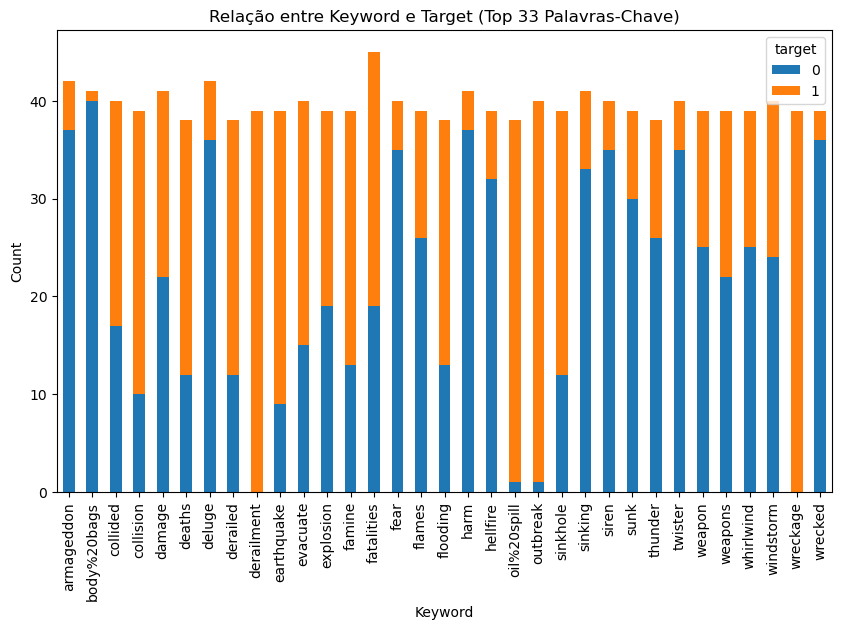

In [10]:
import matplotlib.pyplot as plt

# Calcular a contagem de ocorrências de cada palavra-chave
keyword_counts = df['keyword'].value_counts()

# Selecionar as 33 palavras-chave mais frequentes
top_keywords = keyword_counts.head(33).index

# Filtrar o DataFrame original para incluir apenas as linhas correspondentes às palavras-chave selecionadas
filtered_df = df[df['keyword'].isin(top_keywords)]

# Criar a tabela de contingência entre 'keyword' e 'target' para o DataFrame filtrado
contingency_table = pd.crosstab(filtered_df['keyword'], filtered_df['target'])

# Plotar o gráfico de barras empilhadas
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configurar os rótulos e título do gráfico
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.title('Relação entre Keyword e Target (Top 33 Palavras-Chave)')

# Exibir o gráfico
plt.show()

A relação entre a variável Keyword e a variável Target é demonstrada neste gráfico. A presença de certas palavras-chave pode quantificada matematicamente e utilizada para alimentar um modelo estatístico de predição, nos levando à resposta desejada.

Agora vamos testar quanto seria a precisão de um modelo utilizando só esta variável, no nosso modelo final esperamos fazer uma ávore de decisões multivariadas.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Realizar a codificação de rótulos da coluna 'keyword'
label_encoder = LabelEncoder()
df['keyword_encoded'] = label_encoder.fit_transform(df['keyword'].fillna(''))

# Dividir o DataFrame em recursos (X) e variável alvo (y)
X = df['keyword_encoded']
y = df['target']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=42)

# Redimensionar os dados de recurso (necessário para modelos lineares)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Aplicar o algoritmo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar previsões nos dados de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)

# Exibir os resultados
print("Acurácia:", accuracy)
print("Matriz de Confusão:")
print(confusion)
print("Relatório de Classificação:")
print(classification)

Acurácia: 0.5764984227129337
Matriz de Confusão:
[[1462    0]
 [1074    0]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.58      1.00      0.73      1462
           1       0.00      0.00      0.00      1074

    accuracy                           0.58      2536
   macro avg       0.29      0.50      0.37      2536
weighted avg       0.33      0.58      0.42      2536



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> A acurácia obtida foi de 0.575, ou seja, acertou 57% dos casos, o que indica que esta variável sozinha, não acerta muito, mas em um modelo váriavel ela será bem valiosa.

### Agora vamos abordar outras correlações para incluir em nosso modelo

* Primeiro eu quero ver quanto à contagem de palavras, se existe uma relação entre à quantidade de palavras que aparece em um tweet e se ele é um tweet desastre ou não.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Dividir o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.333, random_state=42)

# Aplicar a vetorização da contagem de palavras
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Treinar um modelo de regressão logística usando as contagens de palavras
model = LogisticRegression()
model.fit(X_train_counts, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test_counts)

# Avaliar o desempenho do modelo usando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 0.805205047318612


>Uia Lá, acertou 80% das previsões =O

Ótimo! Com uma acurácia de 0.805, o modelo obteve um desempenho considerável na previsão do valor da variável alvo com base na contagem de palavras nos tweets, Vamos utilizar esta relação univariada por hoje, depois implementamos um modelo multivariável.

Mas antes vamos plotar um gráfico para visualizar melhor esta relação

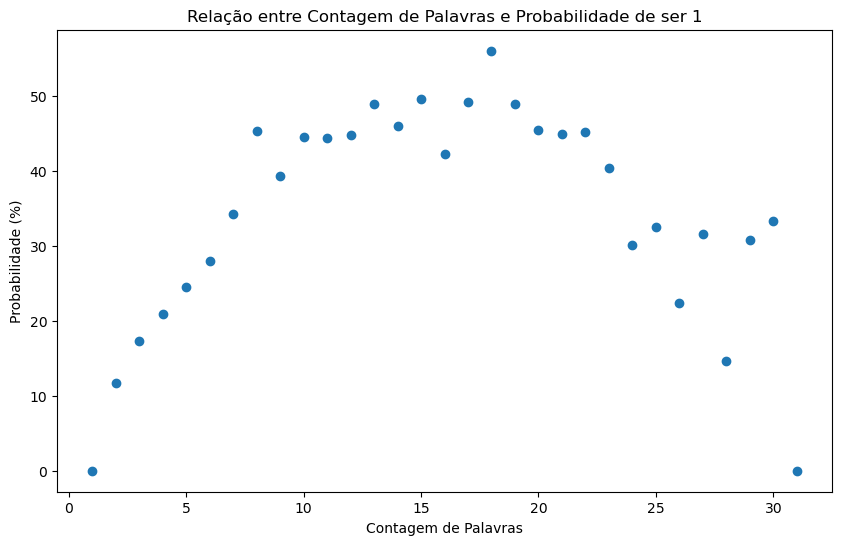

In [13]:
import matplotlib.pyplot as plt

# Contagem de palavras
word_count = df['text'].str.split().apply(len)

# Agrupar contagem de palavras e calcular a probabilidade de ser 1 ou 0 na coluna 'target'
word_count_target = df.groupby(word_count)['target'].mean()

# Criação do gráfico
plt.figure(figsize=(10, 6))
plt.scatter(word_count_target.index, word_count_target.values * 100)
plt.xlabel('Contagem de Palavras')
plt.ylabel('Probabilidade (%)')
plt.title('Relação entre Contagem de Palavras e Probabilidade de ser 1')
plt.show()


# Lendo os conjuntos reais
df_treino = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
df_teste = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
sample_submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")

### Agora vamos criar o modelo com o conjunto completo

In [14]:
# Repetindo modelo
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Pré-processamento de dados
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(df_treino['text'])
X_test = vectorizer.transform(df_teste['text'])

# Treinamento do modelo
model = MultinomialNB()
model.fit(X_train, df_treino['target'])

# Previsões
predictions = model.predict(X_test)
df_teste['target'] = predictions

In [15]:
df_teste

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",1
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,1
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,1
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,1
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,1


In [16]:
sample_submission['target'] = df_teste['target']

In [17]:
# Registrando as predições na competição
sample_submission.to_csv("submission.csv", index=False)

> Feito v 03
